<a href="https://colab.research.google.com/github/Avinash-Reddy-Kovvuri/Deep-Learning-_-Pytorch/blob/main/Test_%26_Train_Error.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)
print(f"{device} is using.")

cuda is using.


In [ ]:

learning_rate = 1e-3
batch_size = 64
epochs = 5

In [ ]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    eoch_loss = 0
    n = 0
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X.to(device))
        loss = loss_fn(pred.to(device), y.to(device))
      
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
            eoch_loss += loss
            n +=1
    return eoch_loss/n
      
    
       


def test_loop(dataloader, model, loss_fn):
    
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.to(device))
            test_loss += loss_fn(pred.to(device), y.to(device)).item()
            correct += ((pred.to(device)).argmax(1) == y.to(device)).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    return test_loss

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
tr_los_li = []
tes_los_li = []
epochs = 50
for t in range(epochs):

    print(f"Epoch {t+1}\n-------------------------------")
    train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loss = test_loop(test_dataloader, model, loss_fn)
    tr_los_li.append(train_loss)
    tes_los_li.append(test_loss)
print("Done!")


Epoch 1
-------------------------------
loss: 2.303483  [    0/60000]
loss: 2.294619  [ 6400/60000]
loss: 2.288193  [12800/60000]
loss: 2.280188  [19200/60000]
loss: 2.284165  [25600/60000]
loss: 2.279289  [32000/60000]
loss: 2.270032  [38400/60000]
loss: 2.278471  [44800/60000]
loss: 2.256738  [51200/60000]
loss: 2.256135  [57600/60000]
Test Error: 
 Accuracy: 36.2%, Avg loss: 2.253032 

Epoch 2
-------------------------------
loss: 2.252514  [    0/60000]
loss: 2.241789  [ 6400/60000]
loss: 2.248965  [12800/60000]
loss: 2.216287  [19200/60000]
loss: 2.233266  [25600/60000]
loss: 2.227056  [32000/60000]
loss: 2.206106  [38400/60000]
loss: 2.230431  [44800/60000]
loss: 2.191923  [51200/60000]
loss: 2.188550  [57600/60000]
Test Error: 
 Accuracy: 54.5%, Avg loss: 2.184840 

Epoch 3
-------------------------------
loss: 2.182722  [    0/60000]
loss: 2.165034  [ 6400/60000]
loss: 2.189430  [12800/60000]
loss: 2.122196  [19200/60000]
loss: 2.154154  [25600/60000]
loss: 2.144970  [32000/600

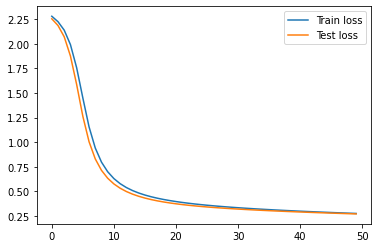

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.plot(pd.DataFrame(np.array(tr_los_li)),label="Train loss")
plt.plot(pd.DataFrame(np.array(tes_los_li)),label="Test loss")
plt.legend()
plt.show()